<a href="https://colab.research.google.com/github/bigirimanainnocent12/Code/blob/main/Methode_de_lissage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel("/content/F10_01072014_1648_722 + FO 20+20_viognier 2013_T200_NV_SYNC_.xlsx")

In [ ]:
# prompt: Créer une dataframe suivant une loi uniforme

import pandas as pd
import numpy as np

df["lisser"] = df['V11'].rolling(window=8).mean()

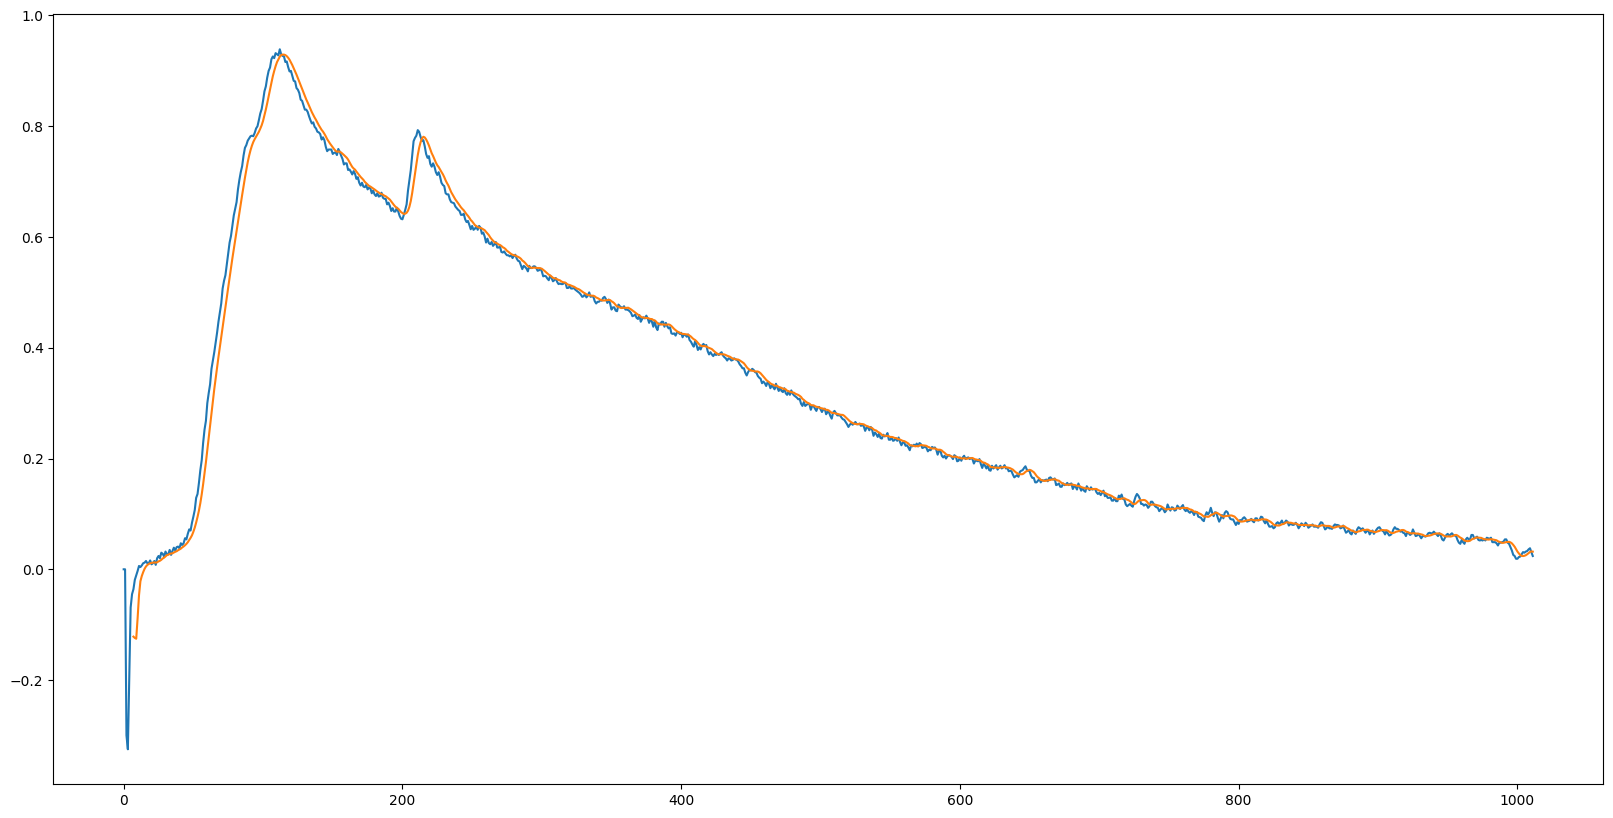

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['lisser'])
plt.show()

# **Interpolation avec Splines**

Les splines peuvent être utilisées pour créer une courbe lisse à travers les points de données sans perdre d'observations.

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Créer une série de données
data = df['V11']
x = np.arange(len(data))

# Appliquer les splines
spline = UnivariateSpline(x, data, s=2)
df["spline"] = spline(x)

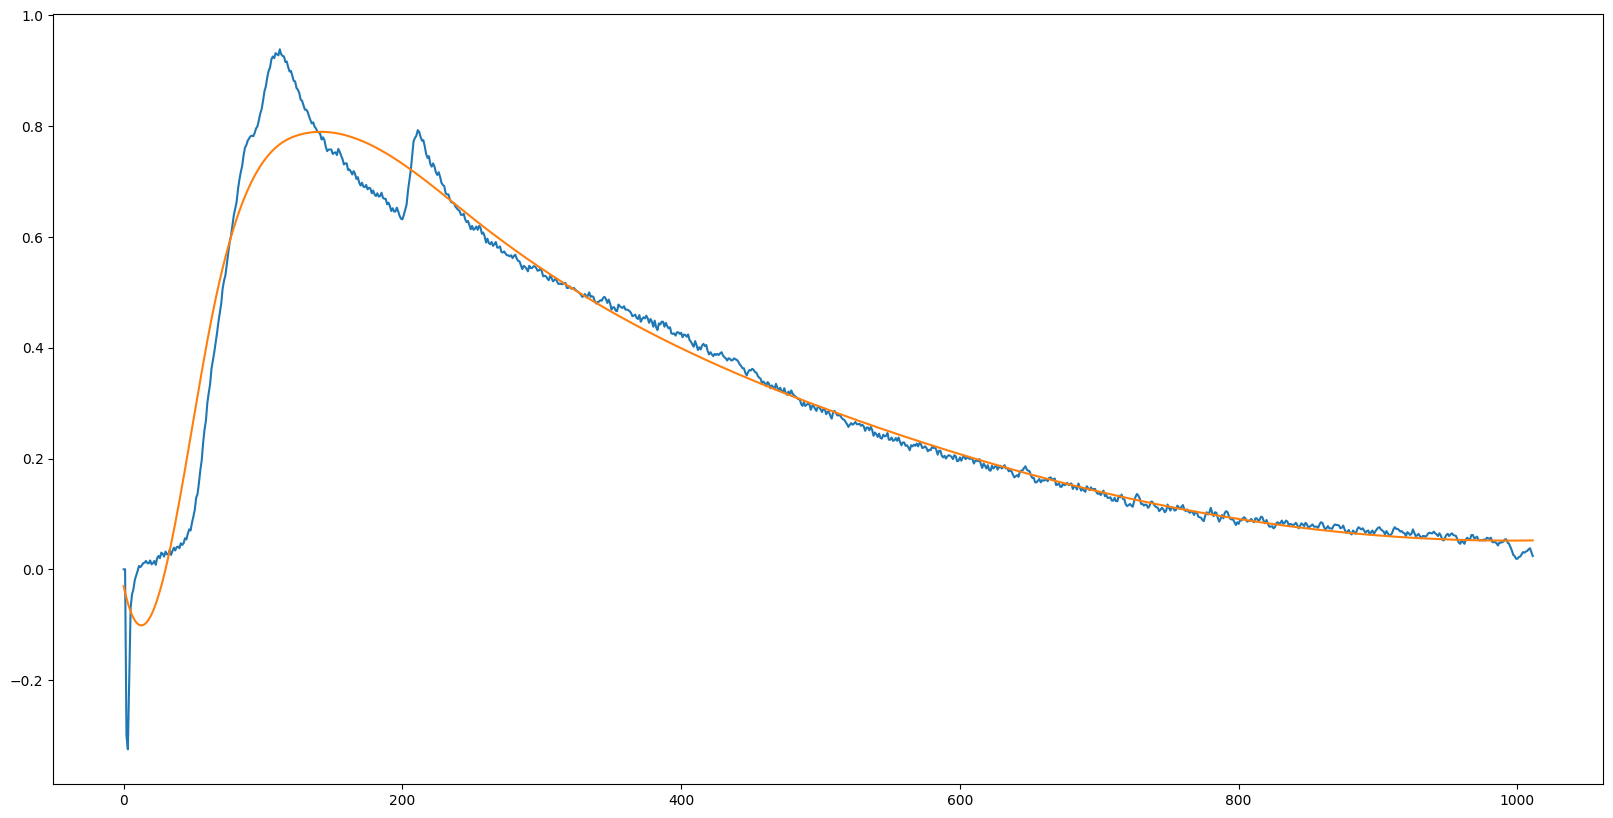

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['spline'])
plt.show()

# **Lissage Exponentiel :**

-
$\textbf{Coefficient de lissage (\(\alpha\))}$ :



$\alpha = \frac{2}{\text{span} + 1}$



Où $\text{span} $ est la période de la moyenne mobile exponentielle.

- $\textbf{Moyenne mobile exponentielle (EMA)} $:


$
\text{EMA}_t = \alpha \times x_t + (1 - \alpha) \times \text{EMA}_{t-1}
$


Où :

- $\text{EMA}_t $ est la valeur actuelle de la moyenne mobile exponentielle

- $x_t$ est la valeur actuelle de la série temporelle
- $\text{EMA}_{t-1}$ est la valeur précédente de la moyenne mobile exponentielle


- $\textbf{Valeur initiale de l'EMA}$ :


$\text{EMA}_0 = x_0$


Pour déterminer la première valeur de l'EMA, on utilise généralement la valeur initiale de la série temporelle $x_0$.


In [ ]:
df["expo"] =df['V11'].ewm(span=12, adjust=False).mean()

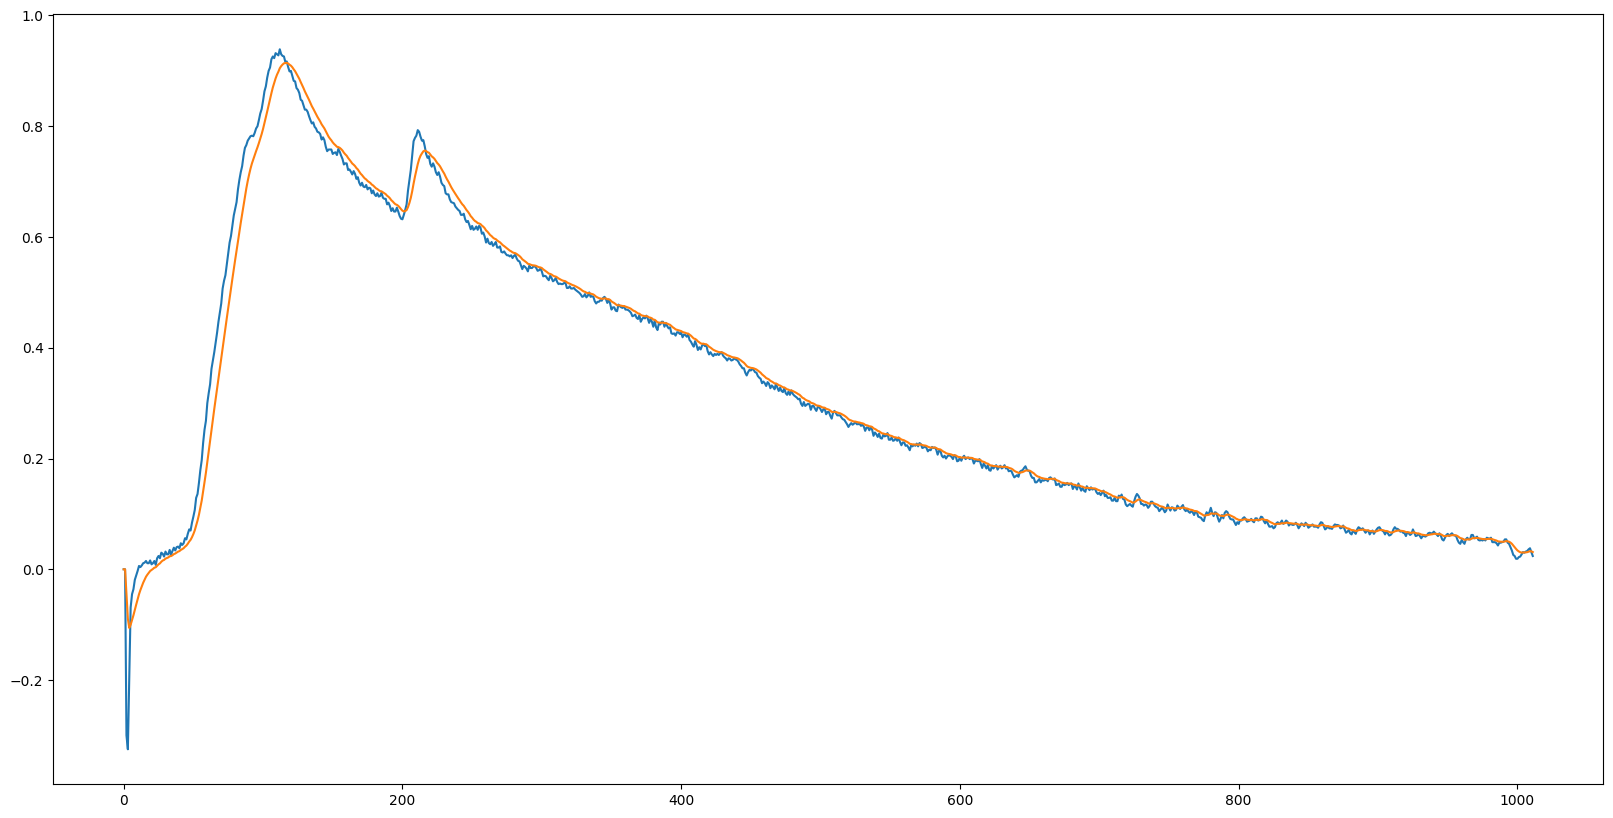

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['expo'])
plt.show()

# **Moyenne Mobile avec min_periods=1**

- Cette méthode calcule la moyenne mobile en incluant les valeurs disponibles même si la fenêtre n'est pas complètement remplie au début de la série,

In [ ]:
# Appliquer une moyenne mobile sur une fenêtre de 3 points
df["Moyenne_Mobile"] = df['V11'].rolling(window=6, min_periods=1).mean()

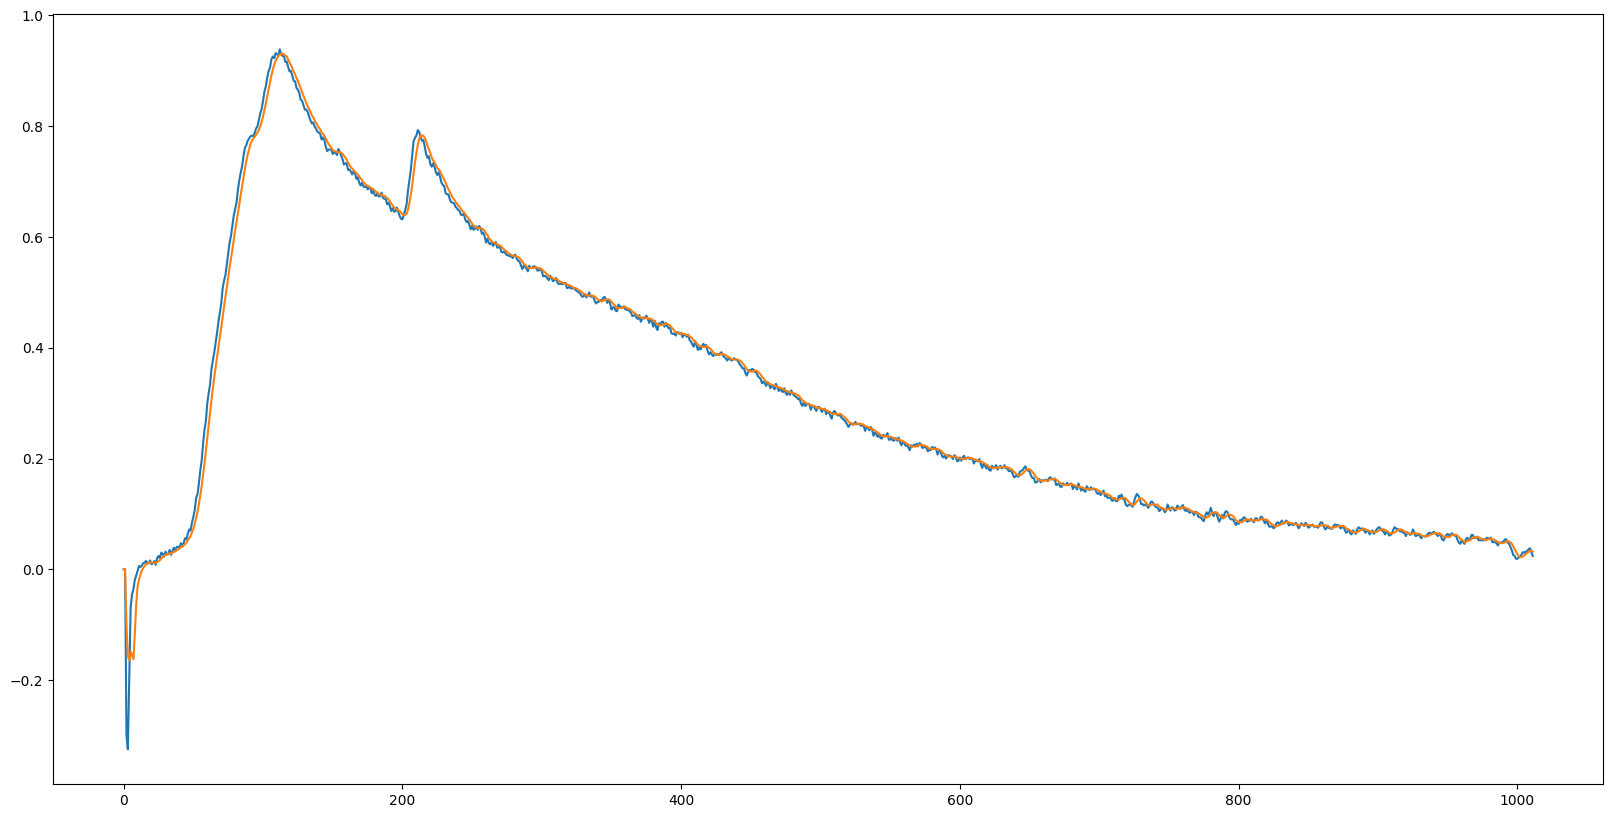

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['Moyenne_Mobile'])
plt.show()